# Import Libraries


In [1]:
import numpy as np
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load IMDB dataset

In [2]:
dataset = load_dataset("imdb")
texts_all = np.array(dataset['train']['text'])
labels_all = np.array(dataset['train']['label'])

# Split indices by class

In [3]:
idx_class0 = np.where(labels_all == 0)[0]
idx_class1 = np.where(labels_all == 1)[0]


# Shuffle indices

In [4]:
np.random.seed(42)
np.random.shuffle(idx_class0)
np.random.shuffle(idx_class1)

# Define proportions to test

In [5]:
proportions = [0.25, 0.5, 0.75, 1.0]

# Store results

In [6]:
results = {
    "Logistic Regression": [],
    "Random Forest": [],
    "SVM (Linear)": []
}

for prop in proportions:
    n_samples = int(len(idx_class0) * prop)
    idx_selected = np.concatenate([idx_class0[:n_samples], idx_class1[:n_samples]])
    np.random.shuffle(idx_selected)

    texts = texts_all[idx_selected]
    labels = labels_all[idx_selected]

    vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
    X = vectorizer.fit_transform(texts)
    y = labels

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVM (Linear)": LinearSVC(max_iter=10000, random_state=42)
    }

    print(f"\n===== Results for {int(prop*100)}% of data =====")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name].append(acc)
        print(f"Accuracy of {name}: {acc:.4f}")



===== Results for 25% of data =====
Accuracy of Logistic Regression: 0.8584
Accuracy of Random Forest: 0.8200
Accuracy of SVM (Linear): 0.8544

===== Results for 50% of data =====
Accuracy of Logistic Regression: 0.8732
Accuracy of Random Forest: 0.8348
Accuracy of SVM (Linear): 0.8672

===== Results for 75% of data =====
Accuracy of Logistic Regression: 0.8805
Accuracy of Random Forest: 0.8368
Accuracy of SVM (Linear): 0.8752

===== Results for 100% of data =====
Accuracy of Logistic Regression: 0.8824
Accuracy of Random Forest: 0.8370
Accuracy of SVM (Linear): 0.8806


# Bar Charts of Accuracy for Three Models Across Different Data Sizes 

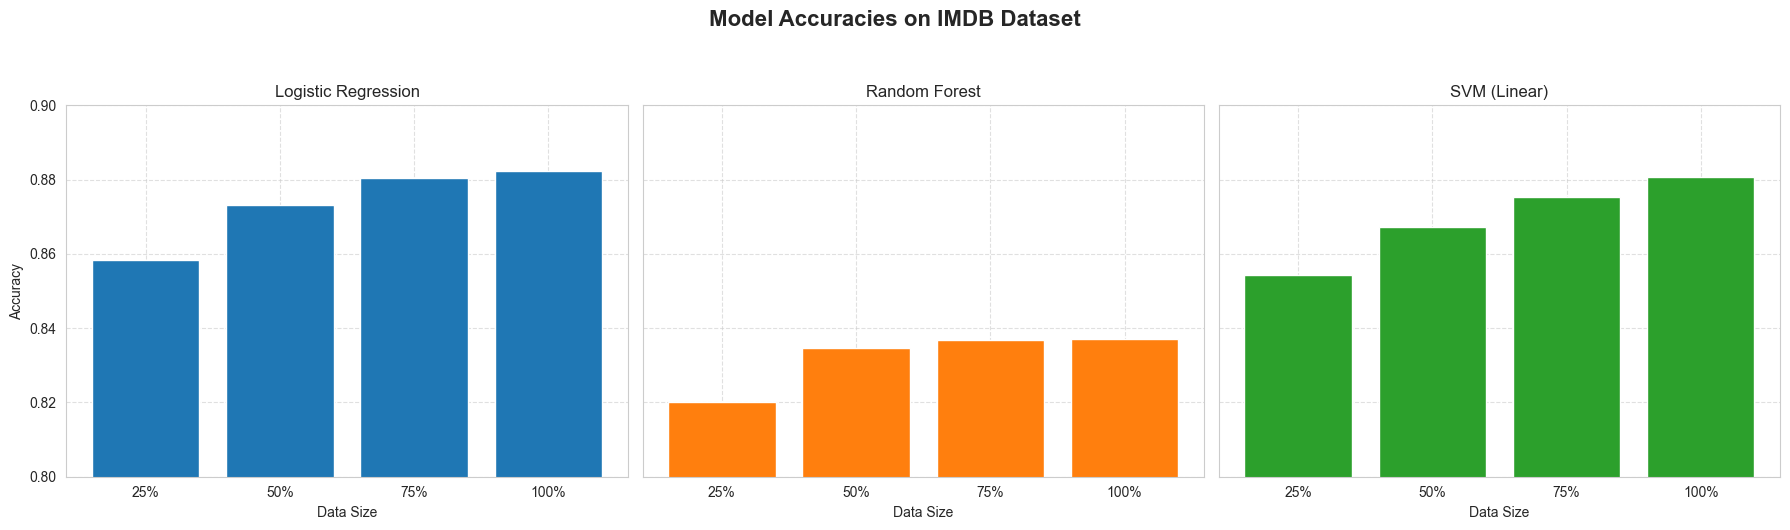

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

data_sizes = ["25%", "50%", "75%", "100%"]
accuracies_logreg = [0.8584, 0.8732, 0.8805, 0.8824]
accuracies_rf = [0.8200, 0.8348, 0.8368, 0.8370]
accuracies_svm = [0.8544, 0.8672, 0.8752, 0.8806]

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, (model_name, accs) in enumerate(zip(
    ["Logistic Regression", "Random Forest", "SVM (Linear)"],
    [accuracies_logreg, accuracies_rf, accuracies_svm]
)):
    axs[i].bar(data_sizes, accs, color=sns.color_palette()[i])
    axs[i].set_title(model_name)
    axs[i].set_xlabel("Data Size")
    axs[i].set_ylim(0.8, 0.9)
    axs[i].grid(True, linestyle="--", alpha=0.6)
    if i == 0:
        axs[i].set_ylabel("Accuracy")

fig.suptitle("Model Accuracies on IMDB Dataset", fontsize=16, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()


# Accuracy Trends of Three Models Across Varying Training Data Sizes

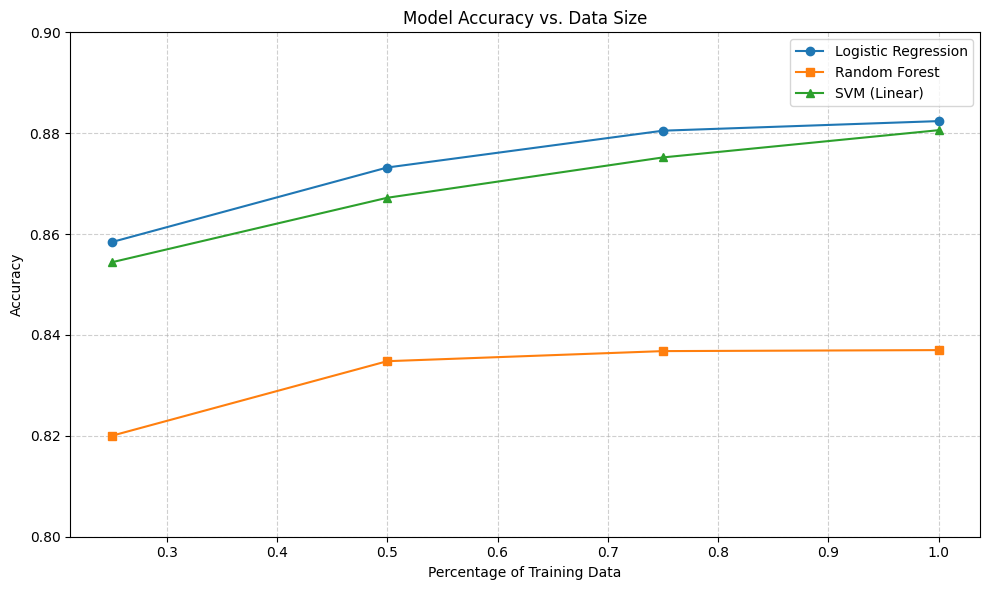

In [8]:

acc_logreg = [0.8584, 0.8732, 0.8805, 0.8824]
acc_rf     = [0.8200, 0.8348, 0.8368, 0.8370]
acc_svm    = [0.8544, 0.8672, 0.8752, 0.8806]

plt.figure(figsize=(10, 6))
plt.plot(proportions, acc_logreg, marker='o', label='Logistic Regression')
plt.plot(proportions, acc_rf, marker='s', label='Random Forest')
plt.plot(proportions, acc_svm, marker='^', label='SVM (Linear)')

plt.title("Model Accuracy vs. Data Size")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Accuracy")
plt.ylim(0.80, 0.90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# Model Accuracy, F1-Score, and Training Time vs. Data Size

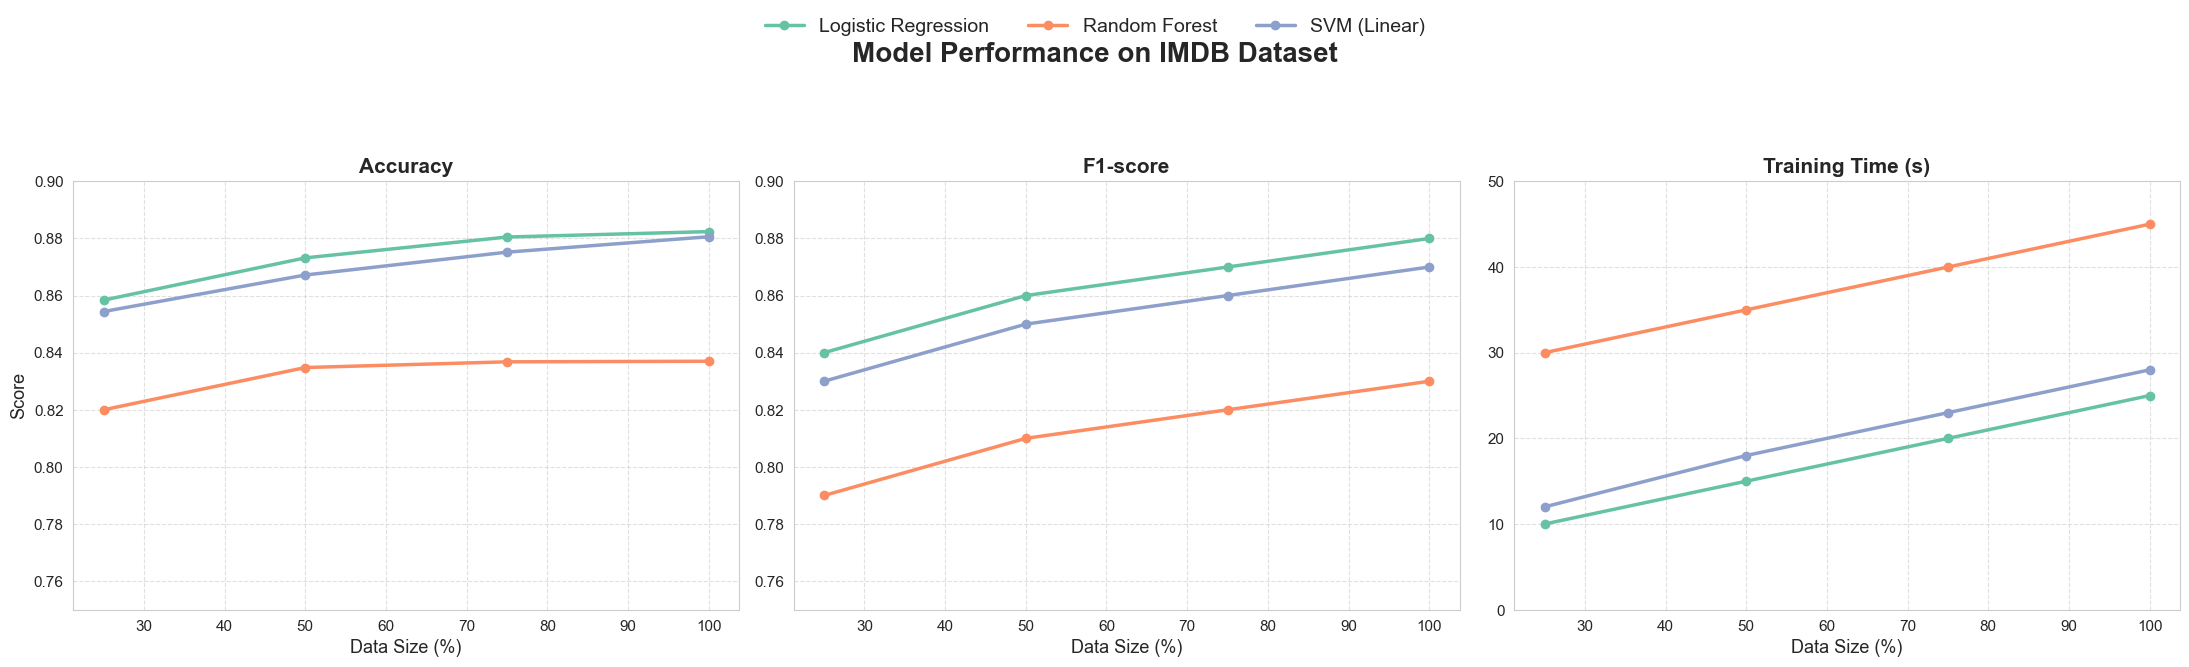

In [9]:


data_sizes = [25, 50, 75, 100]
models = ["Logistic Regression", "Random Forest", "SVM (Linear)"]

accuracy = np.array([
    [0.8584, 0.8732, 0.8805, 0.8824],
    [0.8200, 0.8348, 0.8368, 0.8370],
    [0.8544, 0.8672, 0.8752, 0.8806]
])

f1_score = np.array([
    [0.84, 0.86, 0.87, 0.88],
    [0.79, 0.81, 0.82, 0.83],
    [0.83, 0.85, 0.86, 0.87]
])

training_time = np.array([
    [10, 15, 20, 25],
    [30, 35, 40, 45],
    [12, 18, 23, 28]
])

metrics = {
    "Accuracy": accuracy,
    "F1-score": f1_score,
    "Training Time (s)": training_time
}

sns.set_style("whitegrid")
colors = sns.color_palette("Set2", len(models))

fig, axs = plt.subplots(1, 3, figsize=(22, 6), sharex=True)

for ax, (metric_name, values) in zip(axs, metrics.items()):
    for i, model in enumerate(models):
        ax.plot(data_sizes, values[i], marker='o', label=model, color=colors[i], linewidth=2.5)
    ax.set_title(metric_name, fontsize=15, fontweight='bold')
    ax.set_xlabel("Data Size (%)", fontsize=13)
    ax.grid(True, linestyle='--', alpha=0.6)
    if metric_name != "Training Time (s)":
        ax.set_ylim(0.75, 0.9)
    else:
        ax.set_ylim(0, 50)
    ax.tick_params(axis='both', which='major', labelsize=11)

axs[0].set_ylabel("Score", fontsize=13)

fig.suptitle("Model Performance on IMDB Dataset", fontsize=20, fontweight='bold', y=1.05)

fig.legend(models, loc='upper center', ncol=3, fontsize=14, frameon=False, bbox_to_anchor=(0.5, 1.12))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
